In [1]:
from modules.load import *
from modules.lstm import *
sns.set()
from tensorflow.keras.models import load_model

Using TensorFlow backend.


0:テーブル  
1:椅子  
2:デニム  
3:ダンボール  
4:ペットボトル  
5:指  
6:マジックテープ  
7:スポンジ  
8:ガムテープ  
9:タオル  

# データの集計

In [2]:
#標準化前
def plot_g(title,x,y,start,end,save=False):
    #データの波形の確認の式
    #figureヲ宣言
    flg = plt.figure(figsize=(12,4))
    flg = plt.title(title)
    #x:0スタートなので1を追加  1あたり0.09sなので情報を追加
    flg = plt.plot((x+1)*0.09, y)
    flg = plt.xlabel("time[s]")
    flg = plt.ylabel("Voltage[V]")          
    # 0-9秒
    flg = plt.xlim(start,end)
    # おおよそ2.3-2.5を推移
    flg = plt.ylim(2.4, 2.8)
    flg = plt.show()
    if save ==True:
        name = input("名前を決めてください:")
        fig.savefig("img.png")
        
#標準化後
def standard_plot_g(title,x,y,start,end,save=False):
    #データの波形の確認の式
    #figureヲ宣言
    flg = plt.figure()
    flg = plt.title(title)
    #x:0スタートなので1を追加  1あたり0.09sなので情報を追加
    flg = plt.plot((x+1)*0.09, y)
    flg = plt.xlabel("time[s]")
    flg = plt.ylabel("Voltage[V]")          
    # 0-9秒
    flg = plt.xlim(start,end)
    # おおよそ2.3-2.5を推移
    flg = plt.ylim(-2.0, 2.0)
    flg = plt.show()
    if save ==True:
        name = input("名前を決めてください:")
        fig.savefig("img.png")

In [3]:
#### 学習用データ
df_yubi = load("finger4.csv")
df_table = load("tab3.csv")
df_isu = load("isuisu4.csv")
df_petto = load("pettobb2.csv")
df_dan = load("cardboard5.csv")
df_denim = load("denideni5.csv")
df_magic= load("magic4.csv")
df_gam = load("gamgam4.csv")
df_sponji = load("smonji6.csv")
df_taoru = load("taoru4.csv")

In [4]:
#データを纏める用に作製
df_list = [df_table,df_isu,df_denim,df_dan,df_petto,df_yubi,df_magic,df_sponji,df_gam,df_taoru]
data_col = ["table","chair","denim","cardboard" ,"pettobottle","finger","magic tape" ,"sponge","gum tape","taoru"]

In [5]:
#データセットの作製
k = []
for i in df_list:
    x,y = get_xy(i)
    k.append(y)

data must have only figure data
data must have only figure data
data must have only figure data
data must have only figure data
data must have only figure data
data must have only figure data
data must have only figure data
data must have only figure data
data must have only figure data
data must have only figure data


In [6]:
#x軸用
x

0        0
1        1
2        2
3        3
4        4
      ... 
995    995
996    996
997    997
998    998
999    999
Name: Unnamed: 0, Length: 1000, dtype: int64

In [7]:
#ディクショナリー型のデータセットを作製　key:value = label:wave
df_dict = dict(zip(data_col,k))

In [8]:
df_dict 

{'table': 0      2.74
 1      2.74
 2      2.74
 3      2.75
 4      2.76
        ... 
 995    2.74
 996    2.74
 997    2.74
 998    2.74
 999    2.74
 Name: 0, Length: 1000, dtype: float32,
 'chair': 0      2.53
 1      2.57
 2      2.55
 3      2.61
 4      2.55
        ... 
 995    2.54
 996    2.77
 997    2.60
 998    2.53
 999    2.54
 Name: 0, Length: 1000, dtype: float32,
 'denim': 0      2.71
 1      2.72
 2      2.73
 3      2.73
 4      2.74
        ... 
 995    2.75
 996    2.76
 997    2.75
 998    2.74
 999    2.72
 Name: 0, Length: 1000, dtype: float32,
 'cardboard': 0      2.76
 1      2.76
 2      2.76
 3      2.75
 4      2.74
        ... 
 995    2.71
 996    2.71
 997    2.71
 998    2.71
 999    2.71
 Name: 0, Length: 1000, dtype: float32,
 'pettobottle': 0      2.60
 1      2.60
 2      2.60
 3      2.60
 4      2.60
        ... 
 995    2.59
 996    2.60
 997    2.60
 998    2.60
 999    2.60
 Name: 0, Length: 1000, dtype: float32,
 'finger': 0      2.56
 1     

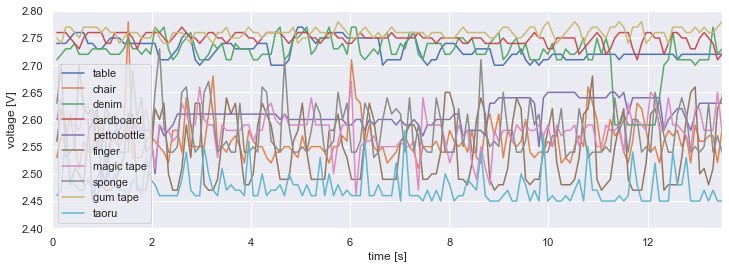

In [9]:
def show_concat(df_dict):
    plt.figure(figsize=(12,4))
    for i in df_dict:
        plt.plot((x+1)*0.09, df_dict[i],  label=i)
    plt.xlim(0,13.5)
    plt.ylim(2.4,2.8)
    plt.xlabel("time [s]")
    plt.ylabel("voltage [V]")
    plt.legend()
    plt.show()

show_concat(df_dict)

# 標準化

In [10]:
#データの標準化の一括
share = []
def standard(df_dict,created_list=[]):
    for i in df_dict:
        y = np.array(df_dict[i]).reshape(-1,1)
        y = scale(y)
        a,y= np.array(y)
        y = np.array(y)
        created_list.append(y)
    return created_list

In [11]:
created_list = standard(df_dict,created_list=[])

In [12]:
created_list

[array([[ 0.23061724],
        [ 0.23061724],
        [ 0.23061724],
        [ 0.6766854 ],
        [ 1.1227534 ],
        [ 1.1227534 ],
        [ 1.1227534 ],
        [ 0.23061724],
        [ 0.23061724],
        [-0.21545087],
        [-0.21545087],
        [ 0.23061724],
        [ 0.6766854 ],
        [ 0.6766854 ],
        [ 0.6766854 ],
        [ 0.23061724],
        [ 0.23061724],
        [ 0.23061724],
        [ 0.23061724],
        [ 0.23061724],
        [ 0.23061724],
        [ 0.23061724],
        [ 0.23061724],
        [-1.1075871 ],
        [-1.1075871 ],
        [-1.1075871 ],
        [-0.66151893],
        [-0.21545087],
        [ 0.6766854 ],
        [ 1.1227534 ],
        [ 0.6766854 ],
        [-1.1075871 ],
        [-1.5536553 ],
        [-1.1075871 ],
        [-1.1075871 ],
        [-0.66151893],
        [-0.21545087],
        [ 0.23061724],
        [ 0.23061724],
        [ 0.23061724],
        [-0.21545087],
        [-0.21545087],
        [-0.21545087],
        [-0

In [13]:
#ディクショナリー型のデータセットを作製　key:value = label:wave
df_dict_std = dict(zip(data_col, created_list))

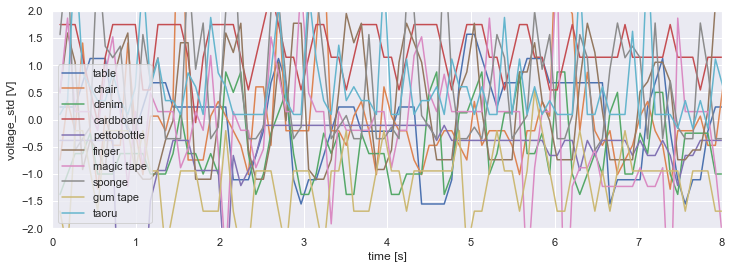

In [14]:
def show_concat_std(df_dict_std):
    plt.figure(figsize=(12,4))
    for i in df_dict:
        plt.plot((x+1)*0.09, df_dict_std[i],  label=i)
    plt.xlim(0,8)
    plt.ylim(-2,2)
    plt.xlabel("time [s]")
    plt.ylabel("voltage_std [V]")
    plt.legend()
    plt.show()

show_concat_std(df_dict_std)

# DataSetの合成

In [15]:
#名前をラベルにしたDataSet
def make_dataset_name(time_steps,df_dict):
    x, y, z =[],[],[]
    h=0
    for i in df_dict:
        data, target = [], []
        maxlen = time_steps

        for j in range(len(df_dict[i])-maxlen):
            data.append(df_dict[i][j:j + maxlen])
            target.append(i)

        re_data = np.array(data).reshape(len(data), maxlen,1 )
        re_target = np.array(target).reshape(len(data), 1)
        csv_data = np.array(data).reshape(len(data), maxlen)
        csv_data=pd.DataFrame(csv_data)
        csv_data["LABEL"] =re_target
        h+=1
        x.append(re_data)
        y.append(re_target)
        z.append(csv_data)
        

    return x,y,z


#ラベルを数値にしたDataSet
def make_dataset(time_steps,df_dict):
    x, y, z =[],[],[]
    h=0
    for i in df_dict:
        data, target = [], []
        maxlen = time_steps

        for j in range(len(df_dict[i])-maxlen):
            data.append(df_dict[i][j:j + maxlen])
            target.append(h)

        re_data = np.array(data).reshape(len(data), maxlen,1 )
        re_target = np.array(target).reshape(len(data), 1)
        csv_data = np.array(data).reshape(len(data), maxlen)
        csv_data=pd.DataFrame(csv_data)
        csv_data["LABEL"] =re_target
        h+=1
        x.append(re_data)
        y.append(re_target)
        z.append(csv_data)
        

    return x,y,z


#ラベルを数値にしたDataSet ストライド付き
def make_dataset_stride(time_steps,df_dict,stride):
    x, y, z =[],[],[]
    h=0
    for i in df_dict:
        data, target = [], []
        maxlen = time_steps

        for j in range(int((len(df_dict[i])-maxlen)/int(stride))):
            data.append(df_dict[i][j*stride:j*stride + maxlen])
            target.append(h)

        re_data = np.array(data).reshape(len(data), maxlen,1 )
        re_target = np.array(target).reshape(len(data), 1)
        csv_data = np.array(data).reshape(len(data), maxlen)
        csv_data=pd.DataFrame(csv_data)
        csv_data["LABEL"] =re_target
        h+=1
        x.append(re_data)
        y.append(re_target)
        z.append(csv_data)
        

    return x,y,z

In [16]:
df_dict_std

{'table': array([[ 0.23061724],
        [ 0.23061724],
        [ 0.23061724],
        [ 0.6766854 ],
        [ 1.1227534 ],
        [ 1.1227534 ],
        [ 1.1227534 ],
        [ 0.23061724],
        [ 0.23061724],
        [-0.21545087],
        [-0.21545087],
        [ 0.23061724],
        [ 0.6766854 ],
        [ 0.6766854 ],
        [ 0.6766854 ],
        [ 0.23061724],
        [ 0.23061724],
        [ 0.23061724],
        [ 0.23061724],
        [ 0.23061724],
        [ 0.23061724],
        [ 0.23061724],
        [ 0.23061724],
        [-1.1075871 ],
        [-1.1075871 ],
        [-1.1075871 ],
        [-0.66151893],
        [-0.21545087],
        [ 0.6766854 ],
        [ 1.1227534 ],
        [ 0.6766854 ],
        [-1.1075871 ],
        [-1.5536553 ],
        [-1.1075871 ],
        [-1.1075871 ],
        [-0.66151893],
        [-0.21545087],
        [ 0.23061724],
        [ 0.23061724],
        [ 0.23061724],
        [-0.21545087],
        [-0.21545087],
        [-0.21545087],
  

In [17]:
x,y,z=make_dataset(20,df_dict_std)

In [75]:
xx,yy,zz=make_dataset_stride(20,df_dict_std,3)

In [76]:
zz[0].shape

(326, 21)

In [77]:
zz[0]

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,LABEL
0,0.230617,0.230617,0.230617,0.676685,1.122753,1.122753,1.122753,0.230617,0.230617,-0.215451,...,0.230617,0.676685,0.676685,0.676685,0.230617,0.230617,0.230617,0.230617,0.230617,0
1,0.676685,1.122753,1.122753,1.122753,0.230617,0.230617,-0.215451,-0.215451,0.230617,0.676685,...,0.676685,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0
2,1.122753,0.230617,0.230617,-0.215451,-0.215451,0.230617,0.676685,0.676685,0.676685,0.230617,...,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,-1.107587,-1.107587,-1.107587,0
3,-0.215451,-0.215451,0.230617,0.676685,0.676685,0.676685,0.230617,0.230617,0.230617,0.230617,...,0.230617,0.230617,0.230617,-1.107587,-1.107587,-1.107587,-0.661519,-0.215451,0.676685,0
4,0.676685,0.676685,0.676685,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,...,-1.107587,-1.107587,-1.107587,-0.661519,-0.215451,0.676685,1.122753,0.676685,-1.107587,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,-0.215451,-0.215451,-0.215451,0.230617,0.230617,0.230617,0.230617,0.230617,-0.215451,0.230617,...,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0
322,0.230617,0.230617,0.230617,0.230617,0.230617,-0.215451,0.230617,0.230617,0.230617,0.230617,...,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,-0.215451,-0.215451,0.230617,0
323,0.230617,0.230617,-0.215451,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,...,0.230617,0.230617,0.230617,-0.215451,-0.215451,0.230617,0.230617,0.230617,0.230617,0
324,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,...,-0.215451,-0.215451,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0


In [78]:
z[9]

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,LABEL
0,0.093308,0.348247,3.152577,0.858125,0.603186,0.348247,0.348247,0.858125,0.348247,0.093308,...,2.642699,0.603186,1.113064,0.348247,0.348247,0.093308,0.858125,0.603186,0.093308,9
1,0.348247,3.152577,0.858125,0.603186,0.348247,0.348247,0.858125,0.348247,0.093308,0.603186,...,0.603186,1.113064,0.348247,0.348247,0.093308,0.858125,0.603186,0.093308,1.877882,9
2,3.152577,0.858125,0.603186,0.348247,0.348247,0.858125,0.348247,0.093308,0.603186,2.642699,...,1.113064,0.348247,0.348247,0.093308,0.858125,0.603186,0.093308,1.877882,0.858125,9
3,0.858125,0.603186,0.348247,0.348247,0.858125,0.348247,0.093308,0.603186,2.642699,0.603186,...,0.348247,0.348247,0.093308,0.858125,0.603186,0.093308,1.877882,0.858125,0.603186,9
4,0.603186,0.348247,0.348247,0.858125,0.348247,0.093308,0.603186,2.642699,0.603186,1.113064,...,0.348247,0.093308,0.858125,0.603186,0.093308,1.877882,0.858125,0.603186,0.093308,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,-1.181388,-0.161631,-1.181388,-0.926449,-1.181388,2.132821,-1.181388,-0.926449,-1.181388,-1.181388,...,0.348247,-1.181388,-1.181388,-1.181388,0.603186,-1.181388,-0.416571,-1.181388,-1.181388,9
976,-0.161631,-1.181388,-0.926449,-1.181388,2.132821,-1.181388,-0.926449,-1.181388,-1.181388,3.917395,...,-1.181388,-1.181388,-1.181388,0.603186,-1.181388,-0.416571,-1.181388,-1.181388,2.132821,9
977,-1.181388,-0.926449,-1.181388,2.132821,-1.181388,-0.926449,-1.181388,-1.181388,3.917395,0.348247,...,-1.181388,-1.181388,0.603186,-1.181388,-0.416571,-1.181388,-1.181388,2.132821,0.603186,9
978,-0.926449,-1.181388,2.132821,-1.181388,-0.926449,-1.181388,-1.181388,3.917395,0.348247,-1.181388,...,-1.181388,0.603186,-1.181388,-0.416571,-1.181388,-1.181388,2.132821,0.603186,-0.416571,9


# 再利用可能なようにcsvファイルとして登録

In [79]:
con = pd.DataFrame(index=[], columns=[])

In [80]:
def make_csv(name,dataset,data_col,save_data=False):
    con = pd.DataFrame(index=[], columns=[])
    for i,j in enumerate(dataset):
        #save_dataをTrueにすると作製
        con=pd.concat([con,j])
        if save_data:
            j.to_csv("{}{}.csv".format(data_col[i],name))
    return con

In [81]:
conm = make_csv("テストだよ",zz,data_col)

In [82]:
zz[0]

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,LABEL
0,0.230617,0.230617,0.230617,0.676685,1.122753,1.122753,1.122753,0.230617,0.230617,-0.215451,...,0.230617,0.676685,0.676685,0.676685,0.230617,0.230617,0.230617,0.230617,0.230617,0
1,0.676685,1.122753,1.122753,1.122753,0.230617,0.230617,-0.215451,-0.215451,0.230617,0.676685,...,0.676685,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0
2,1.122753,0.230617,0.230617,-0.215451,-0.215451,0.230617,0.676685,0.676685,0.676685,0.230617,...,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,-1.107587,-1.107587,-1.107587,0
3,-0.215451,-0.215451,0.230617,0.676685,0.676685,0.676685,0.230617,0.230617,0.230617,0.230617,...,0.230617,0.230617,0.230617,-1.107587,-1.107587,-1.107587,-0.661519,-0.215451,0.676685,0
4,0.676685,0.676685,0.676685,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,...,-1.107587,-1.107587,-1.107587,-0.661519,-0.215451,0.676685,1.122753,0.676685,-1.107587,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,-0.215451,-0.215451,-0.215451,0.230617,0.230617,0.230617,0.230617,0.230617,-0.215451,0.230617,...,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0
322,0.230617,0.230617,0.230617,0.230617,0.230617,-0.215451,0.230617,0.230617,0.230617,0.230617,...,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,-0.215451,-0.215451,0.230617,0
323,0.230617,0.230617,-0.215451,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,...,0.230617,0.230617,0.230617,-0.215451,-0.215451,0.230617,0.230617,0.230617,0.230617,0
324,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,...,-0.215451,-0.215451,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0


In [83]:
conm

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,LABEL
0,0.230617,0.230617,0.230617,0.676685,1.122753,1.122753,1.122753,0.230617,0.230617,-0.215451,...,0.230617,0.676685,0.676685,0.676685,0.230617,0.230617,0.230617,0.230617,0.230617,0
1,0.676685,1.122753,1.122753,1.122753,0.230617,0.230617,-0.215451,-0.215451,0.230617,0.676685,...,0.676685,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0
2,1.122753,0.230617,0.230617,-0.215451,-0.215451,0.230617,0.676685,0.676685,0.676685,0.230617,...,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,-1.107587,-1.107587,-1.107587,0
3,-0.215451,-0.215451,0.230617,0.676685,0.676685,0.676685,0.230617,0.230617,0.230617,0.230617,...,0.230617,0.230617,0.230617,-1.107587,-1.107587,-1.107587,-0.661519,-0.215451,0.676685,0
4,0.676685,0.676685,0.676685,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,0.230617,...,-1.107587,-1.107587,-1.107587,-0.661519,-0.215451,0.676685,1.122753,0.676685,-1.107587,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,-1.181388,-0.671510,-1.181388,1.877882,-0.671510,-1.181388,-0.671510,-1.181388,1.368003,-1.181388,...,-1.181388,-1.181388,-0.161631,-1.181388,-0.926449,-1.181388,2.132821,-1.181388,-0.926449,9
322,1.877882,-0.671510,-1.181388,-0.671510,-1.181388,1.368003,-1.181388,-1.181388,-1.181388,-1.181388,...,-1.181388,-0.926449,-1.181388,2.132821,-1.181388,-0.926449,-1.181388,-1.181388,3.917395,9
323,-0.671510,-1.181388,1.368003,-1.181388,-1.181388,-1.181388,-1.181388,-0.161631,-1.181388,-0.926449,...,2.132821,-1.181388,-0.926449,-1.181388,-1.181388,3.917395,0.348247,-1.181388,-1.181388,9
324,-1.181388,-1.181388,-1.181388,-1.181388,-0.161631,-1.181388,-0.926449,-1.181388,2.132821,-1.181388,...,-1.181388,-1.181388,3.917395,0.348247,-1.181388,-1.181388,-1.181388,0.603186,-1.181388,9


In [84]:
def make_data(concat):
    ex = concat.iloc[:,:-1]
    ex = np.array(ex)
    ex=ex.reshape(-1,ex.shape[1],1)
    label = concat.iloc[:,-1]
    label = np.array(label)
    label = label.reshape(-1,1)
#     label =one_hot(label)
    
    return ex,label

ex,label = make_data(conm)

In [85]:
ex0,label0 = make_data(zz[0])

ex1,label1 = make_data(zz[1])

ex2,label2 = make_data(zz[2])

ex3,label3 = make_data(zz[3])

ex4,label4 = make_data(zz[4])

ex5,label5 = make_data(zz[5])

ex6,label6 = make_data(zz[6])

ex7,label7 = make_data(zz[7])

ex8,label8 = make_data(zz[8])

ex9,label9 = make_data(zz[9])

In [95]:
label4.shape

(326, 1)

In [96]:
ex_list = [ex0,ex1,ex2,ex3,ex4,ex5,ex6,ex7,ex8,ex9]

In [97]:
label_list = [label0,label1,label2,label3,label4,label5,label6,label7,label8,label9]

In [98]:
len(ex_list)

10

In [148]:
X_train, X_test, Y_train, Y_test = split(ex0,label0)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

シャッフルする:1 シャッフルしない:21
testサイズを選んでください0.2


In [149]:
X_train1, X_test1, Y_train1, Y_test1 = split(ex1,label1)
X_train1 = X_train1.astype("float32")
X_test1 = X_test1.astype("float32")

シャッフルする:1 シャッフルしない:21
testサイズを選んでください0.2


In [150]:
X_train2, X_test2, Y_train2, Y_test2 = split(ex2,label2)
X_train2 = X_train2.astype("float32")
X_test2 = X_test2.astype("float32")

シャッフルする:1 シャッフルしない:21
testサイズを選んでください0.2


In [151]:
X_train3, X_test3, Y_train3, Y_test3 = split(ex3,label3)
X_train3 = X_train3.astype("float32")
X_test3 = X_test3.astype("float32")

シャッフルする:1 シャッフルしない:21
testサイズを選んでください0.2


In [152]:
X_train4, X_test4, Y_train4, Y_test4 = split(ex4,label4)
X_train4 = X_train4.astype("float32")
X_test4 = X_test4.astype("float32")

シャッフルする:1 シャッフルしない:21
testサイズを選んでください0.2


In [153]:
X_train5, X_test5, Y_train5, Y_test5 = split(ex5,label5)
X_train5 = X_train5.astype("float32")
X_test5 = X_test5.astype("float32")

シャッフルする:1 シャッフルしない:21
testサイズを選んでください0.2


In [154]:
X_train6, X_test6, Y_train6, Y_test6 = split(ex6,label6)
X_train6 = X_train6.astype("float32")
X_test6 = X_test6.astype("float32")

シャッフルする:1 シャッフルしない:21
testサイズを選んでください0.2


In [155]:
X_train7, X_test7, Y_train7, Y_test7 = split(ex7,label7)
X_train7 = X_train7.astype("float32")
X_test7 = X_test7.astype("float32")

シャッフルする:1 シャッフルしない:21
testサイズを選んでください0.2


In [156]:
X_train8, X_test8, Y_train8, Y_test8 = split(ex8,label8)
X_train8 = X_train8.astype("float32")
X_test8 = X_test8.astype("float32")

シャッフルする:1 シャッフルしない:21
testサイズを選んでください0.2


In [157]:
X_train9, X_test9, Y_train9, Y_test9 = split(ex9,label9)
X_train9 = X_train9.astype("float32")
X_test9 = X_test9.astype("float32")

シャッフルする:1 シャッフルしない:21
testサイズを選んでください0.2


In [158]:
X_tra=np.concatenate([X_train, X_train1,X_train2,X_train3,X_train4,X_train5,X_train6,X_train7,X_train8,X_train9], axis=0)

In [159]:
X_tes=np.concatenate([X_test, X_test1,X_test2,X_test3,X_test4,X_test5,X_test6,X_test7,X_test8,X_test9], axis=0)

In [160]:
Y_tra=np.concatenate([Y_train, Y_train1,Y_train2,Y_train3,Y_train4,Y_train5,Y_train6,Y_train7,Y_train8,Y_train9],axis=0)

In [161]:
Y_tes=np.concatenate([Y_test, Y_test1,Y_test2,Y_test3,Y_test4,Y_test5,Y_test6,Y_test7,Y_test8,Y_test9],axis=0)

In [162]:
Y_train1.shape

(260, 1)

In [163]:
Y_tra = one_hot(Y_tra)

In [164]:
Y_tes = one_hot(Y_tes)

In [165]:
Y_tra.shape

(2600, 10)

In [166]:
X_tra.shape

(2600, 20, 1)

In [167]:
X_train, X_test, Y_train, Y_test = split(X_tra,Y_tra)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

シャッフルする:1 シャッフルしない:21
testサイズを選んでください0.9


# LSTM系列

In [168]:
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Bidirectional,LSTM,TimeDistributed
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [169]:
class Deep:
    
    def __init__(self,batchsize=32,unit=256,label_num=10,dropout=0.3,epochs=30):
        self.batchsize = batchsize
        self.unit = unit
        self.label_num = label_num
        self.dropout = dropout
        self.es = EarlyStopping(monitor='loss', patience=3, verbose=0, mode='auto')
        self.epochs = epochs
    
    def lstm(self,X_train):
        optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
        model = Sequential()
        model.add(LSTM(self.unit, input_shape = (X_train.shape[1], X_train.shape[2]), return_sequences = False))
        model.add(Dropout(self.dropout))
        model.add(Dense(self.label_num))
        model.add(Activation("softmax"))
        model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics = ['accuracy'])
        model.summary()
        return model
    
    def learn(self,model,X_train, Y_train,validation_split):
        history = model.fit(X_train, Y_train,batch_size=self.batchsize, epochs=self.epochs,callbacks=self.es)
        return history
    
    def plot_history(self,history):
    # model loss graph

        def plot_history_loss(fit):
            axL.plot(fit.history['loss'], label="loss for training")
            axL.plot(fit.history['val_loss'],label="loss for validation")
            axL.set_title('model loss')
            axL.set_xlabel('epoch')
            axL.set_ylabel('loss')
            axL.legend(loc='upper right')

        # model accuracy graph

        def plot_history_accuracy(fit):
            axR.plot(fit.history['accuracy'],
                     label="accuracy for training")
            axR.plot(fit.history['val_accuracy'],label="accuracy for validation")
            axR.set_title('model accuracy')
            axR.set_xlabel('epoch')
            axR.set_ylabel('accuracy')
            axR.legend(loc='lower right')

        ig, (axL, axR) = plt.subplots(ncols=2, figsize=(10, 5))
        plt.subplots_adjust(wspace=0.5)
        plot_history_loss(history)
        plot_history_accuracy(history)
        
    def model_save(self,model,model_name):
        model.save("{}.h5".format(model_name))
        model.save_weights("{}_weight.h5".format(model_name))
    
    def test(self,model,X_test,Y_test):
        evaluate_model(model,X_test,Y_test)

In [170]:
ls = Deep(epochs=1)

In [171]:
model = load_model("model_学習3.h5")
model.load_weights("model_学習3_weight.h5")

In [174]:
history = ls.learn(model,X_tra, Y_tra,0.1)

82/82 [==============================] - 2s 19ms/step - loss: 1.3941 - accuracy: 0.5685


In [177]:
ls.test(model,X_tes,Y_tes)

21/21 [==============================] - 0s 6ms/step - loss: 0.7361 - accuracy: 0.7318
loss: 0.7361102104187012 accuracy: 0.7318181991577148


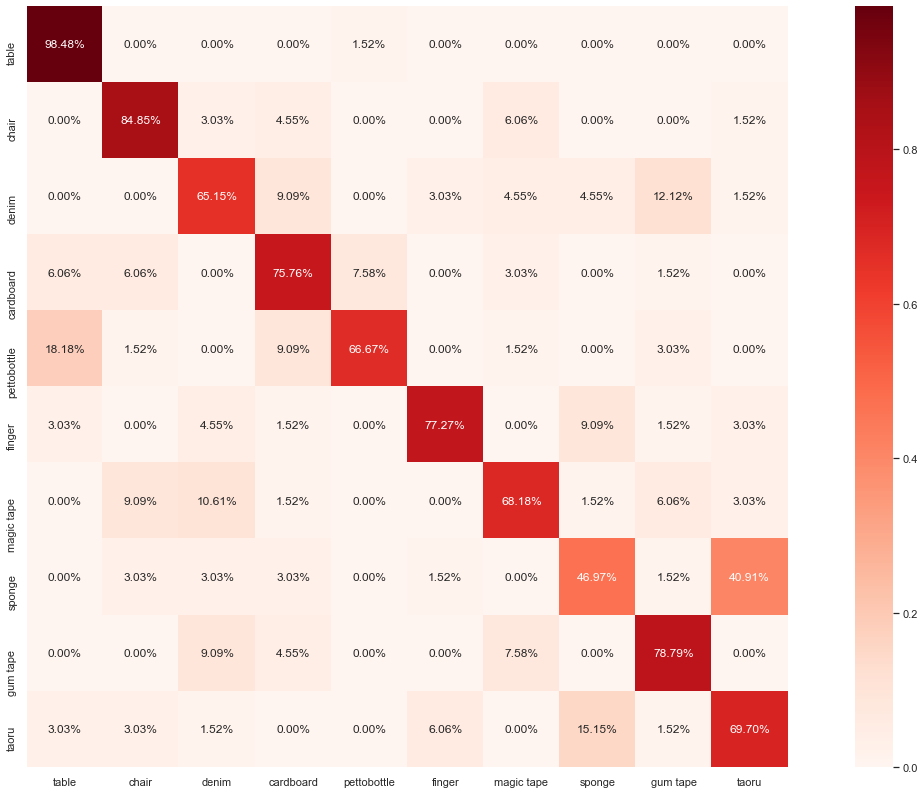

In [178]:
pred = model.predict(X_tes)

#予測データ
y_pred = np.argmax(pred,axis=1)

#正解データ
Y_acc = np.argmax(Y_tes,axis=1)

class_names = data_col
cf_matrix = confusion_matrix(Y_acc, y_pred)
cd_df = pd.DataFrame(cf_matrix)

cd_df.columns=class_names
cd_df.index=class_names

plt.figure(figsize = (24,14))
sns.heatmap(cd_df.astype('float') / cd_df.sum(axis=1), annot=True, fmt='.2%' ,square = True,cmap='Reds')
plt.show()

In [352]:
X_test.shape

(1470, 20, 1)

In [1410]:
ls.model_save(model,"model_fin")

# 学習に失敗したところを可視化する

In [1417]:
y_pred[400:500]

array([1, 1, 1, 9, 9, 9, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6,
       4, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 8, 8, 6, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 0, 2, 6, 6, 6, 6, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6,
       6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [1418]:
Y_acc[400:500]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [1423]:
X_tes[1].shape

(20, 1)

In [1446]:
#あってない番号を記述
miss = []
acc =[]
pre = []
for i, (p, y) in enumerate(zip(y_pred, Y_acc)):
    if p != y:
        print(i,"番",p,"が予測に対し正解は",y,"です")
        miss.append(X_tes[i])
        acc.append(y)
        pre.append(p)

107 番 4 が予測に対し正解は 0 です
112 番 4 が予測に対し正解は 0 です
113 番 4 が予測に対し正解は 0 です
114 番 3 が予測に対し正解は 0 です
115 番 3 が予測に対し正解は 0 です
163 番 4 が予測に対し正解は 0 です
164 番 4 が予測に対し正解は 0 です
165 番 4 が予測に対し正解は 0 です
180 番 4 が予測に対し正解は 0 です
181 番 4 が予測に対し正解は 0 です
182 番 4 が予測に対し正解は 0 です
183 番 4 が予測に対し正解は 0 です
196 番 4 が予測に対し正解は 0 です
197 番 8 が予測に対し正解は 0 です
198 番 8 が予測に対し正解は 0 です
199 番 4 が予測に対し正解は 0 です
244 番 4 が予測に対し正解は 0 です
245 番 4 が予測に対し正解は 0 です
246 番 4 が予測に対し正解は 0 です
247 番 4 が予測に対し正解は 0 です
248 番 4 が予測に対し正解は 0 です
249 番 4 が予測に対し正解は 0 です
256 番 3 が予測に対し正解は 0 です
257 番 3 が予測に対し正解は 0 です
258 番 3 が予測に対し正解は 0 です
265 番 4 が予測に対し正解は 0 です
266 番 3 が予測に対し正解は 0 です
267 番 4 が予測に対し正解は 0 です
268 番 4 が予測に対し正解は 0 です
269 番 4 が予測に対し正解は 0 です
279 番 4 が予測に対し正解は 0 です
281 番 4 が予測に対し正解は 0 です
282 番 4 が予測に対し正解は 0 です
283 番 4 が予測に対し正解は 0 です
284 番 4 が予測に対し正解は 0 です
295 番 7 が予測に対し正解は 1 です
296 番 7 が予測に対し正解は 1 です
297 番 7 が予測に対し正解は 1 です
299 番 7 が予測に対し正解は 1 です
300 番 9 が予測に対し正解は 1 です
301 番 9 が予測に対し正解は 1 です
303 番 9 が予測に対し正解は 1 です
314 番 3 が予測に対し正解は 1 です
315 番 3 が予測

1494 番 2 が予測に対し正解は 5 です
1495 番 2 が予測に対し正解は 5 です
1496 番 2 が予測に対し正解は 5 です
1498 番 3 が予測に対し正解は 5 です
1499 番 2 が予測に対し正解は 5 です
1500 番 2 が予測に対し正解は 5 です
1502 番 2 が予測に対し正解は 5 です
1503 番 2 が予測に対し正解は 5 です
1505 番 2 が予測に対し正解は 5 です
1506 番 2 が予測に対し正解は 5 です
1507 番 2 が予測に対し正解は 5 です
1508 番 2 が予測に対し正解は 5 です
1511 番 3 が予測に対し正解は 5 です
1512 番 3 が予測に対し正解は 5 です
1513 番 3 が予測に対し正解は 5 です
1514 番 3 が予測に対し正解は 5 です
1515 番 2 が予測に対し正解は 5 です
1516 番 2 が予測に対し正解は 5 です
1517 番 2 が予測に対し正解は 5 です
1518 番 2 が予測に対し正解は 5 です
1519 番 2 が予測に対し正解は 5 です
1520 番 2 が予測に対し正解は 5 です
1521 番 2 が予測に対し正解は 5 です
1523 番 0 が予測に対し正解は 5 です
1524 番 0 が予測に対し正解は 5 です
1525 番 0 が予測に対し正解は 5 です
1574 番 7 が予測に対し正解は 5 です
1610 番 2 が予測に対し正解は 5 です
1630 番 0 が予測に対し正解は 5 です
1631 番 0 が予測に対し正解は 5 です
1632 番 4 が予測に対し正解は 5 です
1633 番 6 が予測に対し正解は 5 です
1634 番 6 が予測に対し正解は 5 です
1635 番 6 が予測に対し正解は 5 です
1636 番 6 が予測に対し正解は 5 です
1637 番 2 が予測に対し正解は 5 です
1638 番 2 が予測に対し正解は 5 です
1639 番 2 が予測に対し正解は 5 です
1640 番 2 が予測に対し正解は 5 です
1641 番 2 が予測に対し正解は 5 です
1650 番 3 が予測に対し正解は 5 です
1651 番 3 が予測に対し正

2876 番 0 が予測に対し正解は 9 です
2877 番 0 が予測に対し正解は 9 です
2878 番 0 が予測に対し正解は 9 です
2879 番 0 が予測に対し正解は 9 です
2880 番 0 が予測に対し正解は 9 です
2881 番 0 が予測に対し正解は 9 です
2882 番 0 が予測に対し正解は 9 です
2883 番 0 が予測に対し正解は 9 です
2884 番 0 が予測に対し正解は 9 です
2885 番 3 が予測に対し正解は 9 です
2886 番 4 が予測に対し正解は 9 です
2887 番 8 が予測に対し正解は 9 です
2890 番 6 が予測に対し正解は 9 です
2891 番 7 が予測に対し正解は 9 です
2892 番 7 が予測に対し正解は 9 です
2893 番 7 が予測に対し正解は 9 です
2894 番 7 が予測に対し正解は 9 です
2895 番 7 が予測に対し正解は 9 です
2896 番 7 が予測に対し正解は 9 です
2897 番 7 が予測に対し正解は 9 です
2898 番 7 が予測に対し正解は 9 です
2899 番 7 が予測に対し正解は 9 です
2900 番 7 が予測に対し正解は 9 です
2901 番 7 が予測に対し正解は 9 です
2905 番 7 が予測に対し正解は 9 です
2929 番 7 が予測に対し正解は 9 です
2930 番 7 が予測に対し正解は 9 です


In [1447]:
len(miss)

1034

In [1433]:
x = np.arange(0,20)

In [1434]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [1452]:
"正解が",acc[31],"に対し",pre[31],"と予測しました"

('正解が', 0, 'に対し', 4, 'と予測しました')

In [1455]:
X_tra.shape

(6860, 20, 1)

No handles with labels found to put in legend.


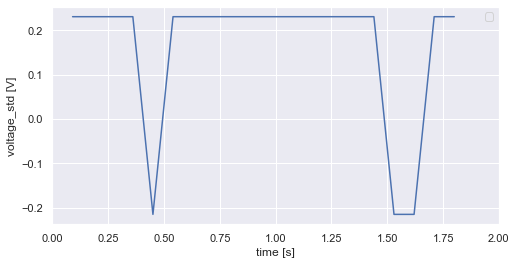

In [1453]:
plt.figure(figsize=(8,4))
plt.plot((x+1)*0.09, miss[31])
plt.xlim(0,2)
plt.xlabel("time [s]")
plt.ylabel("voltage_std [V]")
plt.legend()
plt.show()

No handles with labels found to put in legend.


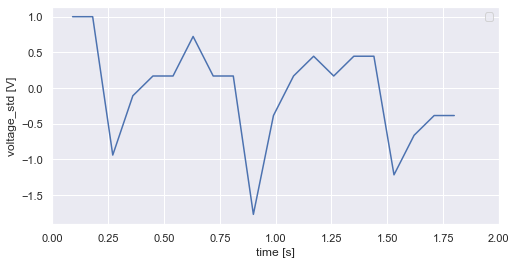

In [1457]:
plt.figure(figsize=(8,4))
plt.plot((x+1)*0.09, X_tra[3200])
plt.xlim(0,2)
plt.xlabel("time [s]")
plt.ylabel("voltage_std [V]")
plt.legend()
plt.show()

In [782]:
ls.test(modell,X_tes,Y_tes)

62/62 [==============================] - 0s 5ms/step - loss: 2.6811 - accuracy: 0.5561
loss: 2.6811087131500244 accuracy: 0.5561224222183228


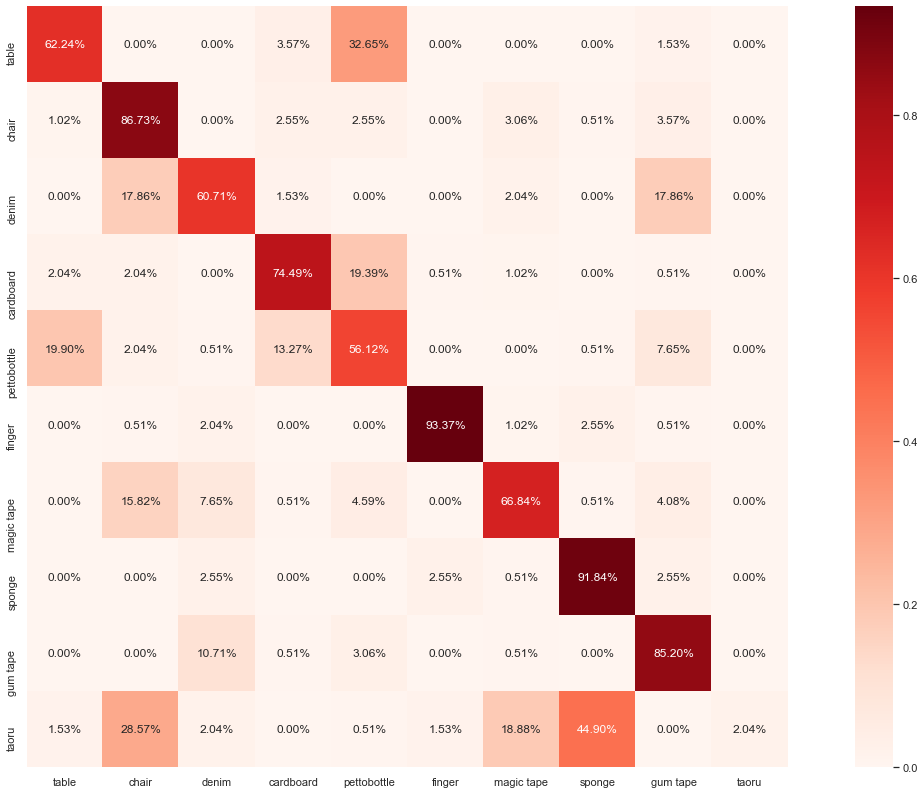

In [783]:
pred = model.predict(X_tes)

#予測データ
y_pred = np.argmax(pred,axis=1)

#正解データ
Y_acc = np.argmax(Y_tes,axis=1)

class_names = data_col
cf_matrix = confusion_matrix(Y_acc, y_pred)
cd_df = pd.DataFrame(cf_matrix)

cd_df.columns=class_names
cd_df.index=class_names

plt.figure(figsize = (24,14))
sns.heatmap(cd_df.astype('float') / cd_df.sum(axis=1), annot=True, fmt='.2%' ,square = True,cmap='Reds')
plt.show()

In [765]:
ls.model_save(model,"model_学習4")

In [36]:
rr = load_model("model20_3.h5")
rr.load_weights("model_weight20_3.h5")

In [37]:
ls.test(rr,X_test,Y_test)

21/21 [==============================] - 0s 6ms/step - loss: 0.5081 - accuracy: 0.8696
loss: 0.5081348419189453 accuracy: 0.8696318864822388


In [147]:
X_test.shape

(652, 19, 1)

In [72]:
kk = "skkk"

In [74]:
kk.replace("j","k")

'skkk'